# AsaPY

### Asa Analysis

#### Analysis.feature_score

    """
    Calculate the score of input features using the specified scoring function.

    This function applies a specified scoring function to evaluate the relevance of each input feature for the output
    variable in a given DataFrame. The supported scoring functions are those provided by sklearn's feature_selection module.

    Args:
        df (pd.DataFrame): The input data, where each column is a feature and each row is an observation.
        x (List[str]): A list of names of the input features in 'df'.
        y (str): The name of the output feature in 'df'.
        scoring_function (str): The name of the scoring function to be used. Should be one of the following:
            - 'r_regression'
            - 'f_regression'
            - 'mutual_info_regression'
            - 'chi2'
            - 'f_classif'
            - 'mutual_info_classif'
        verbose (bool, optional): Whether to print detailed output. Default is False.
        save_path (str, optional): Path to save the plotted figure. If not specified, the figure is simply shown.

    Raises:
        ValueError: If 'scoring_function' is not one of the supported scoring functions.

    Returns:
        pd.DataFrame: A DataFrame where each row corresponds to an input feature, and the 'score' column contains
            the corresponding score. The DataFrame is sorted by score in descending order.
    """

### Seleção de Features

A seleção de features, ou seleção de características, é uma etapa crucial na preparação dos dados para a modelagem preditiva. Essa técnica visa identificar e selecionar as variáveis de entrada mais relevantes para a tarefa de previsão, o que pode ser vital por várias razões.

Em muitos problemas de aprendizado de máquina, um grande número de variáveis de entrada pode levar a uma maior complexidade computacional, aumentando o tempo de treinamento e a demanda de memória do sistema. Também pode resultar em um risco de overfitting, onde o modelo se ajusta excessivamente aos dados de treinamento, perdendo a capacidade de generalizar para dados não vistos. Além disso, a inclusão de características irrelevantes ou redundantes pode degradar o desempenho do modelo.

A seleção de features é frequentemente comparada à redução de dimensionalidade, mas são conceitos distintos. A seleção envolve escolher um subconjunto de características existentes, mantendo-as inalteradas. Por outro lado, a redução de dimensionalidade cria novas características através da combinação de características existentes, resultando em um espaço de características de dimensão inferior. Embora ambos tenham o objetivo de simplificar o conjunto de dados, eles fazem isso de maneiras diferentes.

Existem vários métodos de seleção de features, como métodos filtrados, que avaliam a relevância de cada característica individualmente com base em estatísticas; métodos wrapper, que utilizam um modelo preditivo para avaliar a qualidade das características selecionadas; e métodos embarcados, que incorporam a seleção de características como parte do processo de treinamento de um modelo.

Em resumo, a seleção de características é uma etapa vital na preparação dos dados, ajudando a melhorar o desempenho e a eficiência dos modelos de aprendizado de máquina. É um processo que requer cuidado e compreensão, pois a seleção adequada de características pode levar à construção de modelos mais robustos e eficazes.

Mais informações: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

#### Método `feature_score`

O método `feature_score` utiliza diferentes funções de pontuação do módulo `feature_selection` do scikit-learn para avaliar a importância ou relevância de cada característica (ou feature) em relação à variável de saída. Dependendo da função de pontuação escolhida, o "score" ou pontuação pode representar diferentes métricas estatísticas:

- **f_regression**: Testa a dependência linear individual de duas amostras. Retorna os valores F (indicando a variância explicada por cada característica dividida pela variância não explicada) e os valores p.
- **mutual_info_regression**: Estima a informação mútua (MI) para uma variável contínua. MI entre duas variáveis é uma medida não-negativa que mede a dependência entre as variáveis; é igual a zero se e somente se duas variáveis são independentes.
- **r_regression**: Não é uma função padrão no scikit-learn. Talvez você esteja se referindo ao coeficiente de correlação de Pearson, que mede a dependência linear entre duas variáveis.
- **chi2**: Realiza o teste Qui-quadrado para amostras não negativas para classificação. Mede a dependência entre variáveis estocásticas, sendo útil para tarefas de seleção de recursos discretos.
- **f_classif**: Calcula o valor ANOVA F para os dados fornecidos. Usado em cenários de classificação.
- **mutual_info_classif**: Estima a informação mútua para uma variável discreta. Semelhante ao `mutual_info_regression`, mas é usado em cenários de classificação.

O "score" representa o quão relevante ou importante é uma característica em relação à variável alvo, com base na métrica estatística específica da função de pontuação escolhida. Por exemplo, em `f_regression`, um score mais alto indica que uma maior proporção da variância na variável dependente é "explicada" pela característica. Em funções de informação mútua, um score mais alto indica uma maior dependência entre a característica e a variável alvo.

Ao interpretar os scores, é crucial entender o significado da métrica estatística da função de pontuação escolhida e como ela se relaciona com a relevância da característica.


2023-12-19 17:09:30.252344: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 17:09:30.303207: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 17:09:30.304288: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-19 17:09:31.288016: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Using TensorFlow backend
    feature      score
 2  bmi         230.65
 8  s5          207.27
 3  bp          106.52
 7  s4          100.07
 6  s3           81.24
 9  s6           75.4
 4  s1           20.71
 0  age          16.1
 5  s2           13.75
 1  sex           0.82


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


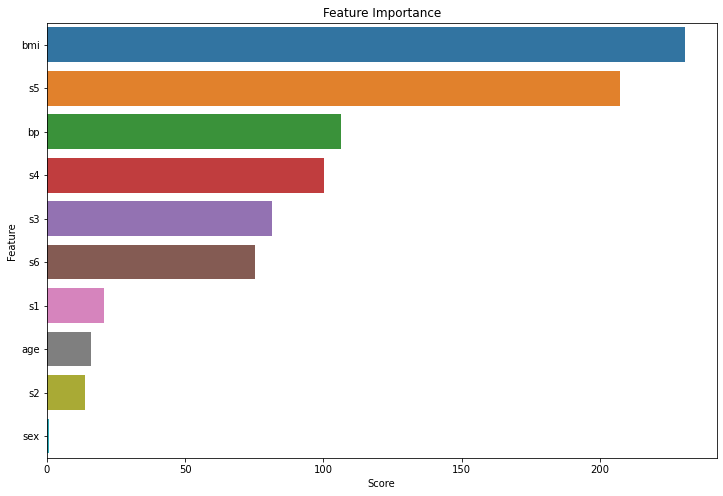

In [1]:
import asapy
from sklearn.datasets import load_diabetes

X, y  = load_diabetes(as_frame=True, return_X_y=True)
feature_list = X.columns.tolist()
X['target'] = y

Analysis = asapy.Analysis

scores = Analysis.feature_score(X,feature_list, ['target'], 'f_regression', verbose = True)